# Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Data Analysis and Modeling
OSEMN Framework

* Obtain
* Scrub
* Explore
* Model
* INterpret

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mlp
import matplotlib.pyplot as plt
%matplotlib inline 
from IPython.display import Image
import os
import sklearn
pd.set_option('display.max_columns', 50)

/Users/miguelsantana/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Modeling & Evaluation Packages
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import Imputer, PolynomialFeatures, StandardScaler
from sklearn.feature_selection import VarianceThreshold, SelectFromModel
from sklearn.model_selection import StratifiedKFold, KFold, cross_val_score, GridSearchCV, learning_curve, train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import gc
import re

# Obtain

## Data Frame

In [3]:
df = pd.read_csv('churn_dataset.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [5]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [6]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [7]:
# for col in df.columns: # preliminary view of value counts per column
#     try:
#         print(col, df[col].value_counts()[:10])
#     except:
#         print(col, df[col].value_counts())
#         # If there aren't 5+ unique values for a column the first print statement
#         # will throw an error for an invalid idx slice
#     print('\n') # Break up the output between columns

# Scrub

## Multicollinearity

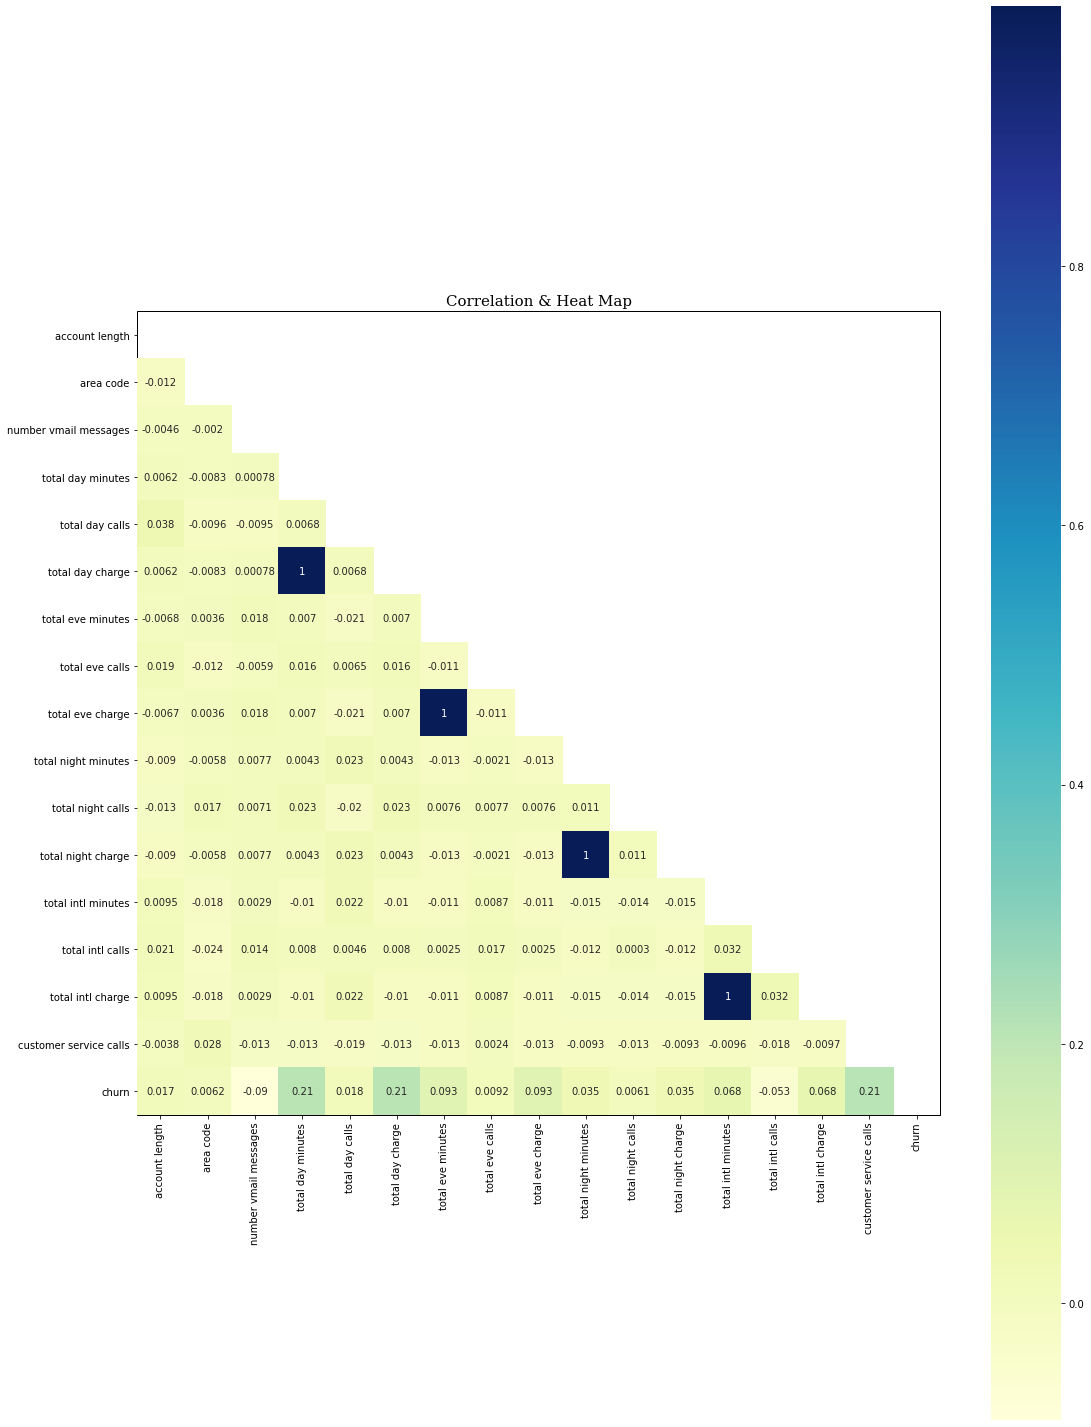

In [8]:
corr = df.corr() # analyzing correlation
# corr
fig, ax = plt.subplots(figsize=(18,26))
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, mask=mask, square=True, annot=True, cmap="YlGnBu")
#xticklabels=labels, yticklabels=labels)
#plt.xticks(rotation=-45, fontsize=16)
ax.patch.set_edgecolor('black')  
ax.patch.set_linewidth('1')
ax.set_title("Correlation & Heat Map", fontsize=15, fontfamily="serif")
plt.show()

## Casting Datatypes 

In [9]:
numfeats = df.select_dtypes('number').columns # selecting the numerical columns for observation
numfeats

Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls'],
      dtype='object')

In [10]:
# model_cols = ['account length', 'area code', 'number vmail messages',
#        'total day minutes', 'total day calls', 'total day charge',
#        'total eve minutes', 'total eve calls', 'total eve charge',
#        'total night minutes', 'total night calls', 'total night charge',
#        'total intl minutes', 'total intl calls', 'total intl charge',
#        'customer service calls'] # Checking distributions

# for column in model_cols:
#     df[column].plot.hist(density=True) # Creating a Histogram
#     df[column].plot.kde(label=column) # Creating a KDE plot
#     plt.legend() # Create Legends
#     plt.show()

In [11]:
# ID column is phone number
catfeats = ['state', 'area code', 'international plan', 'voice mail plan', 'churn'] # recast categorical
for col in catfeats:
    df[col] = df[col].astype('category')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   state                   3333 non-null   category
 1   account length          3333 non-null   int64   
 2   area code               3333 non-null   category
 3   phone number            3333 non-null   object  
 4   international plan      3333 non-null   category
 5   voice mail plan         3333 non-null   category
 6   number vmail messages   3333 non-null   int64   
 7   total day minutes       3333 non-null   float64 
 8   total day calls         3333 non-null   int64   
 9   total day charge        3333 non-null   float64 
 10  total eve minutes       3333 non-null   float64 
 11  total eve calls         3333 non-null   int64   
 12  total eve charge        3333 non-null   float64 
 13  total night minutes     3333 non-null   float64 
 14  total night calls       

## Outliers

In [13]:
df.describe() # addressing outliers on account length

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [14]:
# IQR Outlier Removal Function
def iqr_outlier_rem(df, col_name):
    start_len = len(df)
    Q1 = df[col_name].quantile(0.25)
    Q3 = df[col_name].quantile(0.75)
    IQR = Q3-Q1 # Finding interquartile range
    lower_threshold  = Q1-1.5*IQR
    upper_threshold = Q3+1.5*IQR
    new_df = df.loc[(df[col_name] > lower_threshold) & (df[col_name] < upper_threshold)]
    print(f'There were {start_len - len(new_df)} outliers removed from {col_name}')
    return new_df

In [15]:
df = iqr_outlier_rem(df, 'account length')

There were 18 outliers removed from account length


# Explore - EDA

In [16]:
# plt.figure(figsize=(16,8))
# plt.subplot(221)
# sns.scatterplot(df['total day minutes'], df['total day charge'])
# plt.title('Total Day Minutes X Day Charge')

# plt.subplot(222)
# sns.scatterplot(df['total eve minutes'], df['total eve charge'])
# plt.title('Total eve Minutes X Eve Charge')

# plt.subplot(223)
# sns.scatterplot(df['total night minutes'], df['total night charge'])
# plt.title('Total Night Minutes X Night Charge')

# plt.subplot(224)
# sns.scatterplot(df['total intl minutes'], df['total intl charge'])
# plt.title('Total Intl Minutes X Intl Charge')

# # #plt.title('Sqft_living15 and Price')

# plt.subplots_adjust(hspace=0.35)
# plt.show()

In [17]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


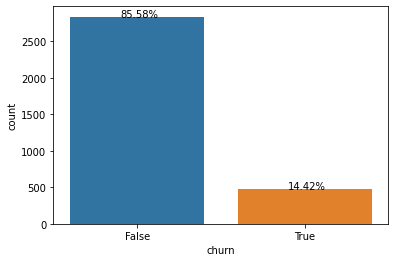

In [18]:
ax=sns.countplot(x="churn",data=df)
for p in ax.patches:
        ax.annotate('{:.2f}%'.format((p.get_height()/df.shape[0])*100), (p.get_x()+0.3, p.get_height()))

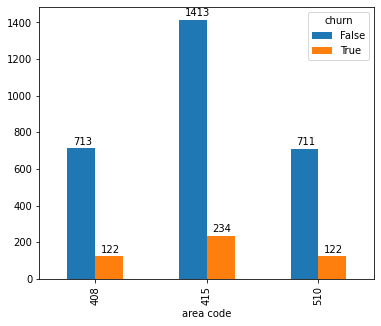

In [19]:
ac = df.groupby(["area code", "churn"]).size().unstack().plot(kind='bar', stacked=False,figsize=(6,5))
for i in ac.patches:
    #ac.annotate('{:.2f}%'.format((p.get_height()/df.shape[0])*100), (p.get_x()+0.3, p.get_height()))
    ac.text(i.get_x()+0.05, i.get_height()+20,str(i.get_height()))

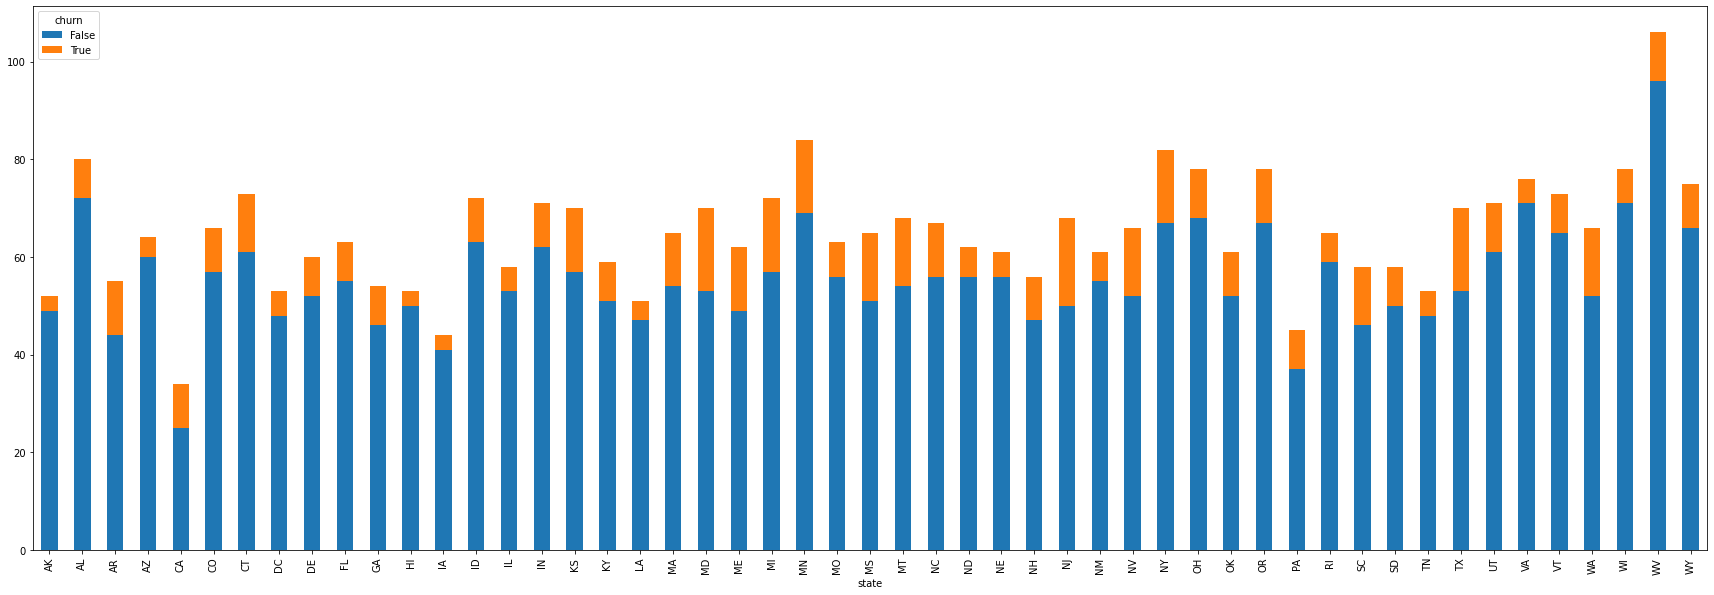

In [20]:
df.groupby(["state", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(30,10)); # churn by statea

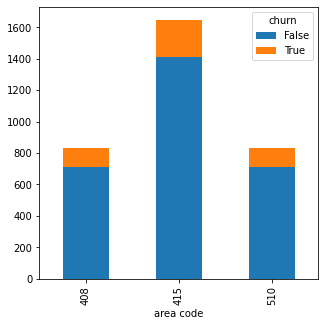

In [21]:
df.groupby(["area code", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)); # churn by area code

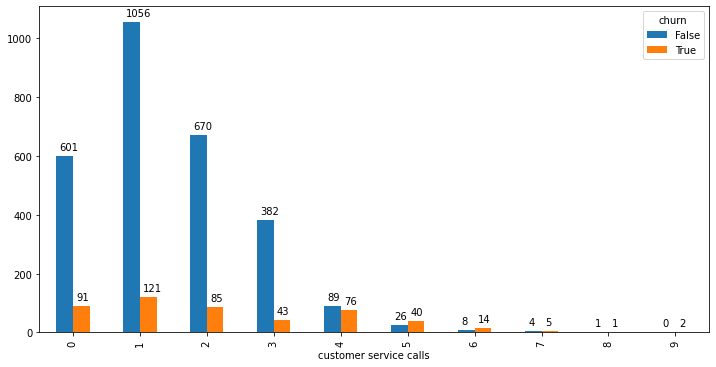

In [22]:
cs = df.groupby(["customer service calls", "churn"]).size().unstack().plot(kind='bar', stacked=False,figsize=(12,6))
for i in cs.patches:
    cs.text(i.get_x()+0.05, i.get_height()+20,int(i.get_height()))

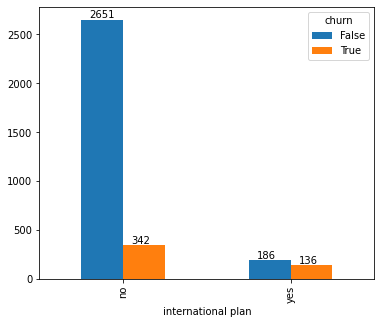

In [23]:
ip=df.groupby(["international plan", "churn"]).size().unstack().plot(kind='bar', stacked=False,figsize=(6,5))
for i in ip.patches:
    ip.text(i.get_x()+0.05, i.get_height()+20,str(i.get_height()))

In [24]:
# df['phone_number'].value_counts() # no duplicates

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3315 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   state                   3315 non-null   category
 1   account length          3315 non-null   int64   
 2   area code               3315 non-null   category
 3   phone number            3315 non-null   object  
 4   international plan      3315 non-null   category
 5   voice mail plan         3315 non-null   category
 6   number vmail messages   3315 non-null   int64   
 7   total day minutes       3315 non-null   float64 
 8   total day calls         3315 non-null   int64   
 9   total day charge        3315 non-null   float64 
 10  total eve minutes       3315 non-null   float64 
 11  total eve calls         3315 non-null   int64   
 12  total eve charge        3315 non-null   float64 
 13  total night minutes     3315 non-null   float64 
 14  total night calls       

In [26]:
# dup = df[df.id.duplicated(keep=False)]
# print('Renovated vs. Non-renovated homes Resold (2014-2015)')
# print(dup['yr_renovated'].value_counts())
# dup['yr_renovated'].hist(figsize = (10,10), color = "green"); #let's make a histogram to compare
# plt.title('Renovated vs. Non-renovated homes Resold (2014-2015)', fontdict={'fontsize': 16});

## Dropping Features

In [27]:
df_fresh = df.copy()

In [28]:
# dup = df[[df['phone_number'].duplicated(keep=False)]]
# dup.head()
# #dup['phone_number'].value_counts()

In [29]:
df = df.drop(['phone number', 'total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes'], axis=1)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3315 entries, 0 to 3332
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   state                   3315 non-null   category
 1   account length          3315 non-null   int64   
 2   area code               3315 non-null   category
 3   international plan      3315 non-null   category
 4   voice mail plan         3315 non-null   category
 5   number vmail messages   3315 non-null   int64   
 6   total day calls         3315 non-null   int64   
 7   total day charge        3315 non-null   float64 
 8   total eve calls         3315 non-null   int64   
 9   total eve charge        3315 non-null   float64 
 10  total night calls       3315 non-null   int64   
 11  total night charge      3315 non-null   float64 
 12  total intl calls        3315 non-null   int64   
 13  total intl charge       3315 non-null   float64 
 14  customer service calls  

In [31]:
# One Hot Encode
df = pd.get_dummies(df, drop_first=True)

In [32]:
# cleaning column names
subs = [(' ', '_'),('.0',''),('.','')]

def col_formatting(col):
    for old, new in subs:
        col = col.replace(old,new)
    return col

df.columns = [col_formatting(col) for col in df.columns]

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3315 entries, 0 to 3332
Data columns (total 66 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3315 non-null   int64  
 1   number_vmail_messages   3315 non-null   int64  
 2   total_day_calls         3315 non-null   int64  
 3   total_day_charge        3315 non-null   float64
 4   total_eve_calls         3315 non-null   int64  
 5   total_eve_charge        3315 non-null   float64
 6   total_night_calls       3315 non-null   int64  
 7   total_night_charge      3315 non-null   float64
 8   total_intl_calls        3315 non-null   int64  
 9   total_intl_charge       3315 non-null   float64
 10  customer_service_calls  3315 non-null   int64  
 11  state_AL                3315 non-null   uint8  
 12  state_AR                3315 non-null   uint8  
 13  state_AZ                3315 non-null   uint8  
 14  state_CA                3315 non-null   

In [34]:
# Defining Variables
outcome = 'churn_True'
x_cols = list(df.columns)
x_cols.remove(outcome)
# Test Train Split
train, test = train_test_split(df)
print(len(train), len(test))

2486 829


In [35]:
# Fitting the model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             churn_True   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     9.758
Date:                Thu, 17 Sep 2020   Prob (F-statistic):           7.04e-82
Time:                        11:26:24   Log-Likelihood:                -641.82
No. Observations:                2486   AIC:                             1416.
Df Residuals:                    2420   BIC:                             1800.
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.5301      0.091     -5.837      0.000      -0.708      -0.352
account_length             0.0001      0.000      0.797      0.426      -0.000       0.000
number_vmail_messages      0.0026      0.002      1.568      0.117      -0.001       0.006
total_day_calls         3.711e-05      0.000      0.116      0.908      -0.001       0.001
total_day_charge           0.0078      0.001     11.139      0.000       0.006       0.009
total_eve_calls           -0.0001      0.000     -0.384      0.701      -0.001       0.001
total_eve_charge           0.0073      0.001      4.917      0.000       0.004       0.010
total_night_calls          0.0004      0.000      1.209      0.227      -0.000       0.001
total_night_charge         0.0091      0.003      3.191      0.001       0.003       0.015
total_intl_calls          -0.0098      0.003     -3.798      0.000      -0.015      -0.005
total_intl_charge          0.0319      0.009      3.727      0.000       0.015       0.049
customer_service_calls     0.0572      0.005     11.382      0.000       0.047       0.067
state_AL                   0.0188      0.067      0.281      0.778      -0.112       0.150
state_AR               -8.639e-05      0.074     -0.001      0.999      -0.146       0.146
state_AZ                   0.0240      0.071      0.340      0.734      -0.115       0.163
state_CA                   0.2059      0.083      2.485      0.013       0.043       0.368
state_CO                   0.0357      0.069      0.513      0.608      -0.101       0.172
state_CT                   0.1163      0.068      1.705      0.088      -0.017       0.250
state_DC                   0.0517      0.077      0.675      0.500      -0.099       0.202
state_DE                   0.0303      0.071      0.426      0.670      -0.109       0.170
state_FL                   0.0426      0.071      0.603      0.546      -0.096       0.181
state_GA                   0.0637      0.074      0.858      0.391      -0.082       0.209
state_HI                  -0.0203      0.074     -0.277      0.782      -0.164       0.124
state_IA                   0.0107      0.075      0.143      0.887      -0.136       0.158
state_ID                   0.0583      0.068      0.857      0.392      -0.075       0.192
state_IL                  -0.0341      0.072     -0.471      0.638      -0.176       0.108
state_IN                  -0.0157      0.070     -0.223      0.824      -0.154       0.122
state_KS                   0.0838      0.068      1.225      0.221      -0.050       0.218
state_KY                   0.0865      0.071      1.221      0.222      -0.052       0.225
state_LA                   0.0144      0.074      0.195      0.845      -0.130       0.159
state_MA                   0.0803      0.069      1.162      0.245      -0.055  

In [36]:
# Function to create two plots - normality / homoscedasticity
def model_visual(residuals):
# QQ Plot
    '''Checking residuals for normality'''
    fig, axes = plt.subplots(ncols=2, figsize=(20, 5))
    sm.graphics.qqplot(model.resid, fit=True, line='45', ax=axes[0])
    axes[0].set_title('QQ Plot Normality Check', fontsize=20)
    axes[0].set_xlabel('Theoretical Quantiles', fontsize=15)
    axes[0].set_ylabel('Sample Quantiles', fontsize=14)
# Homoscedasticity
    '''Checking Homoscedasticity assumption'''
    ax=axes[1]
    ax.scatter(train['churn_True'], model.resid)
    ax.axhline(0, color='red')
    axes[1].set_title('Homoscedasticity Check', fontsize=20)
    axes[1].set_xlabel('Price', fontsize=15)
    axes[1].set_ylabel('Model Residuals', fontsize=14)
    plt.show();
    return model_visual

In [37]:
# model_visual(model.resid)

In [38]:
# VIF Scores
x = df.drop('churn_True', axis = 1)
x = sm.add_constant(x)
vif = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif_results = pd.Series(dict(zip(x.columns, vif)))

# Identifying VIF
threshold = 6
rem_vif = list(vif_results[vif_results > threshold].index)
if 'const' in rem_vif:
    rem_vif.remove('const')
rem_vif

['number_vmail_messages', 'voice_mail_plan_yes']

In [39]:
df = df.drop(['number_vmail_messages', 'voice_mail_plan_yes'], axis=1)

In [40]:
# # Defining Variables
# outcome = 'churn_True'
# x_cols = list(df.columns)
# x_cols.remove(outcome)
# # Test Train Split
# train, test = train_test_split(df)
# print(len(train), len(test))

# # Fitting the model
# predictors = '+'.join(x_cols)
# formula = outcome + '~' + predictors
# model = ols(formula=formula, data=train).fit()
# model.summary()